## Predict waist circumfrance in cm, w/ some DTI RSI measures

In [1]:
from BPt import BPt_ML
import pandas as pd
import os

In [2]:
main_dr = '/home/sage/work/'

# Base data directories, 2.0 release with most of the phenotype information
nda_dr = main_dr + 'ABCD2p0NDA/'

# This folder contains the re-released 2.0.1 fixed MRI derived measurements
nda_dr2 = main_dr + 'ABCDFixRelease2p0p1/'

#This file stores the name mapping
map_file = os.path.join(nda_dr2, 'Fix Release Notes 2.0.1_Public', '24. ABCD_Release_2.0.1_Updates',
                        'abcd_2.0.1_mapping.csv')

# Target loc
target_loc = nda_dr + 'abcd_ant01.txt'

# Data loc
data_loc1 = nda_dr2 + 'mri_rsi_p102.txt'
data_loc2 = nda_dr2 + 'mri_rsi_p202.txt'

# Strat loc
strat1 = os.path.join(nda_dr, 'acspsw03.txt')

In [3]:
ML = BPt_ML(exp_name = 'Waist_Circ',
            log_dr = None,
            random_state = 1)

ML.Set_Default_Load_Params(dataset_type = 'basic',
                           eventname = 'baseline_year_1_arm_1')

exp_name = Waist_Circ
log_dr = None
existing_log = append
verbose = True
exp log dr setup at: None
log file at: None
Default params set:
notebook = True
use_abcd_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 1
n_jobs = 1
dpi = 100
mp_context = spawn
BPt_ML object initialized
Default load params set within self.default_load_params.
----------------------
dataset_type: basic
subject_id: src_subject_id
eventname: baseline_year_1_arm_1
eventname_col: eventname
overlap_subjects: False
merge: inner
na_values: ['777', '999']
drop_na: True
drop_or_na: drop



## Load waist size + filter by some obvious outliers

cleared targets.

Loading /home/sage/work/ABCD2p0NDA/abcd_ant01.txt  with dataset type: basic
4951 subjects have been dropped based on passed eventname params.
Dropped 0 cols for all missing values
Dropped 17 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: anthro_waist_cm
Filtering for outliers by stds: (3, 4)
Min-Max value (pre-filter): 0.0 90.0
Min-Max value (post outlier filtering): 15.0 45.5
10

Dropped 50 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...
Loaded Shape: (11808, 1)
All loaded targets
0 : anthro_waist_cm

Set to overlapping loaded subjects.
-- anthro_waist_cm --


,anthro_waist_cm
count,11808.000
mean,26.454
std,4.199
min,15.000
25%,23.500
50%,25.500
75%,28.500
max,45.500
median,25.500
skew,1.072


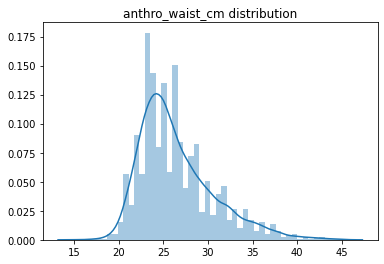

In [4]:
ML.Load_Targets(loc = target_loc,
                col_name = 'anthro_waist_cm',
                data_type = 'float',
                filter_outlier_std = (3,4),
                clear_existing = True)

ML.Show_Targets_Dist()

## Load RSI DTI data (just fiberrat, to keep # of features managable)

In [5]:
ML.Load_Data(loc = [data_loc1, data_loc2],
             inclusion_keys = ['_fiberat_'],
             filter_outlier_std = 6,
             clear_existing = True)

Cleared loaded data.

Loading /home/sage/work/ABCDFixRelease2p0p1/mri_rsi_p102.txt  with dataset type: basic
dropped ['collection_id', 'mri_rsi_p102_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'dmri_rsi_visitid', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type
Loading /home/sage/work/ABCDFixRelease2p0p1/mri_rsi_p202.txt  with dataset type: basic
dropped ['collection_id', 'mri_rsi_p202_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Keeping 294 columns per passed inclusion_keys argument
Dropped 0 cols for all missing values
Dropped 659 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Dropped 145 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...

Processing unique col values with drop threshold: 0 - warn thresho

Set to overlapping loaded subjects.
Plotting data distribution.
Viewing data with shape: (10539, 294)

Loaded data top columns by skew:
dmri_rsinds2_fiberat_fmin    -1.985922
dmri_rsinds2_fiberat_unclh   -1.710355
dmri_rsind_fiberat_fmin      -1.681296
dmri_rsint_fiberat_fmin      -1.671180
dmri_rsind_fiberat_unclh     -1.609528
                                ...   
dmri_rsints2_fiberat_cstlh    0.692562
dmri_rsints2_fiberat_unclh    0.804596
dmri_rsin0s2_fiberat_unclh    0.804956
dmri_rsin0s2_fiberat_fmin     0.975788
dmri_rsints2_fiberat_fmin     0.976148
Length: 294, dtype: float64



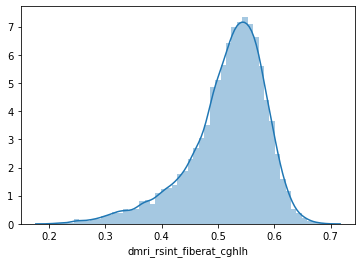

In [6]:
ML.Show_Data_Dist()

## Load Family ID & Sex as strat vars

In [7]:
ML.Load_Strat(loc=strat1,
              col_name='rel_family_id')

ML.Load_Strat(loc=data_loc1,
              col_name='sex')

Loading /home/sage/work/ABCD2p0NDA/acspsw03.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 2 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Loaded Shape: (11873, 1)
Loading /home/sage/work/ABCDFixRelease2p0p1/mri_rsi_p102.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 1 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Loaded Shape: (11399, 1)
Merged with existing (merge=inner)
New combined shape: (11397, 2)


## Define val strat on family id

In [8]:
ML.Define_Validation_Strategy(groups='rel_family_id')

Calling Prepare_All_Data() to change the default merge behavior call it again!
Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (10537, 297)
CV defined with group preserving over 9000 unique values.


## Train Test Split

In [9]:
ML.Train_Test_Split(test_size = .2)

Performing split on 10537 subjects!
random_state: 1
Test split size: 0.2

Performed train test split
Train size: 8448
Test size:  2089


## Modelling

In [10]:
from BPt import Problem_Spec

In [11]:
spec = Problem_Spec(problem_type = 'regression',
                    scorer = ['r2', 'neg_mean_absolute_error'],
                    n_jobs = 8)

ML.Set_Default_ML_Verbosity()

Default ML verbosity set within self.default_ML_verbosity.
----------------------
save_results: False
progress_bar: True
progress_loc: None
compute_train_score: False
show_init_params: True
fold_name: False
time_per_fold: False
score_per_fold: False
fold_sizes: False
best_params: False
save_to_logs: False



# Baseline w/ just linear model

In [12]:
from BPt import Model_Pipeline, Model

linear_pipeline = Model_Pipeline()

results = ML.Evaluate(model_pipeline = linear_pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

model=\
Model(extra_params={}, obj='linear')

param_search=\
None



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = linear






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.23634341429310338
Micro Std in Validation score:  0.020236362064473823
Macro Std in Validation score:  0.0010761506394288411

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.7917405776228135
Micro Std in Validation score:  0.03150242037934
Macro Std in Validation score:  0.008657664598616499



In [13]:
pipeline = Model_Pipeline(model = Model('ridge', params=1))

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

model=\
Model(extra_params={}, obj='ridge', params=1)

param_search=\
None



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.24920995168769156
Micro Std in Validation score:  0.023344438027403807
Macro Std in Validation score:  0.0017485293209251324

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.8147276648617545
Micro Std in Validation score:  0.041314440003316494
Macro Std in Validation score:  0.001127991443933718



In [14]:
from BPt import Param_Search

# Add param search
search = Param_Search(n_iter = 60)
pipeline.param_search = search

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

model=\
Model(extra_params={}, obj='ridge', params=1)

param_search=\
Param_Search(mp_context='spawn', n_iter=60)



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge0






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.24914502994002113
Micro Std in Validation score:  0.02344298685245124
Macro Std in Validation score:  0.0016127708072935093

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.8147799341425155
Micro Std in Validation score:  0.041452093976340275
Macro Std in Validation score:  0.0008308023716532276



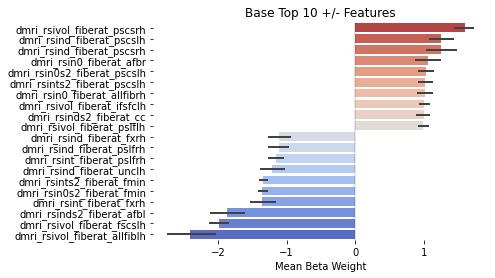

In [15]:
ML.Plot_Global_Feat_Importances()

## Let's try sex specific versions

In [16]:
from BPt import Value_Subset

spec.subjects = Value_Subset('sex', 0)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

subjects set to:  [('sex', 0)]

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

model=\
Model(extra_params={}, obj='ridge', params=1)

param_search=\
Param_Search(mp_context='spawn', n_iter=60)



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = Value_Subset(name=sex, value=0)
len(subjects) = 5436 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge1






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.22757437960398202
Micro Std in Validation score:  0.02020386059479771
Macro Std in Validation score:  0.0052384695501188905

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.890520501416619
Micro Std in Validation score:  0.007815957348151758
Macro Std in Validation score:  0.004939164578599664



In [17]:
spec.subjects = Value_Subset('sex', 1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

subjects set to:  [('sex', 1)]

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

model=\
Model(extra_params={}, obj='ridge', params=1)

param_search=\
Param_Search(mp_context='spawn', n_iter=60)



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = Value_Subset(name=sex, value=1)
len(subjects) = 5961 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge2






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.2062363809542766
Micro Std in Validation score:  0.030588061343983695
Macro Std in Validation score:  0.003129079524304454

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.839755031369947
Micro Std in Validation score:  0.04003928901478081
Macro Std in Validation score:  0.008328935159463091



In [18]:
# Back to all
spec.subjects = 'all'

## Choice of initial scaler?

### Standard scaler

In [19]:
from BPt import Scaler

pipeline.scaler = Scaler('standard')

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

model=\
Model(extra_params={}, obj='ridge', params=1)

param_search=\
Param_Search(mp_context='spawn', n_iter=60)



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge3






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.24914502994002113
Micro Std in Validation score:  0.02344298685245124
Macro Std in Validation score:  0.0016127708072935093

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.8147799341425155
Micro Std in Validation score:  0.041452093976340275
Macro Std in Validation score:  0.0008308023716532276



### Power transformer based scaler, either yeo or boxcox, since all our values are positive, we can use the faster boxcox, if we had any data points with negative values we would need to use yeo

In [20]:
pipeline.scaler = Scaler('boxcox')

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

model=\
Model(extra_params={}, obj='ridge', params=1)

param_search=\
Param_Search(mp_context='spawn', n_iter=60)



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge4






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.24914502994002113
Micro Std in Validation score:  0.02344298685245124
Macro Std in Validation score:  0.0016127708072935093

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.8147799341425155
Micro Std in Validation score:  0.041452093976340275
Macro Std in Validation score:  0.0008308023716532276



### Let's stick with robust scaler, even though  boxcox gives boost, its a small one + increases runtime

## Try a different search_types / hyperparameter optimizers

In [21]:
pipeline.scaler = Scaler('robust')
pipeline.param_search.search_type = 'RandomSearch'

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

model=\
Model(extra_params={}, obj='ridge', params=1)

param_search=\
Param_Search(mp_context='spawn', n_iter=60)



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge5






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.24914502994002113
Micro Std in Validation score:  0.02344298685245124
Macro Std in Validation score:  0.0016127708072935093

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.8147799341425155
Micro Std in Validation score:  0.041452093976340275
Macro Std in Validation score:  0.0008308023716532276



In [22]:
pipeline.param_search.search_type = 'TwoPointsDE'

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

model=\
Model(extra_params={}, obj='ridge', params=1)

param_search=\
Param_Search(mp_context='spawn', n_iter=60, search_type='TwoPointsDE')



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge6






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.24934580745135979
Micro Std in Validation score:  0.023441827583697932
Macro Std in Validation score:  0.0018075768293511485

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.8144263157620175
Micro Std in Validation score:  0.04175434271233377
Macro Std in Validation score:  0.0011722633046380437



## We can try some other models as well

### Elastic net with param search

In [23]:
pipeline.model = Model('elastic net', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

model=\
Model(extra_params={}, obj='elastic net', params=1)

param_search=\
Param_Search(mp_context='spawn', n_iter=60, search_type='TwoPointsDE')



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = elastic net



/home/sage/anaconda3/envs/home/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31004.7317627502, tolerance: 9.810266659514362
  positive)
/home/sage/anaconda3/envs/home/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8291.398133533738, tolerance: 9.89818476606145
  positive)
/home/sage/anaconda3/envs/home/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21869.23946027104, tolerance: 9.765240635615594
  positive)
/home/sage/anaconda3/envs/home/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. 




Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.26349143792498103
Micro Std in Validation score:  0.01830186644531734
Macro Std in Validation score:  0.00259468367138338

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.7853831499138653
Micro Std in Validation score:  0.0321138291197572
Macro Std in Validation score:  0.003206792019915916



### Light gradient boosting machine with param search

In [24]:
pipeline.model = Model('light gbm', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

model=\
Model(extra_params={}, obj='light gbm', params=1)

param_search=\
Param_Search(mp_context='spawn', n_iter=60, search_type='TwoPointsDE')



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = light gbm






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.15806479914013027
Micro Std in Validation score:  0.01543419788688497
Macro Std in Validation score:  0.0012497471420711698

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.979928563019633
Micro Std in Validation score:  0.04277278127674823
Macro Std in Validation score:  0.0021057915864779453



### Non-linear svm (w/ rbf kernel) param search

In [25]:
pipeline.model = Model('svm', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

model=\
Model(extra_params={}, obj='svm', params=1)

param_search=\
Param_Search(mp_context='spawn', n_iter=60, search_type='TwoPointsDE')



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = svm






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.24843967416671303
Micro Std in Validation score:  0.017857657226903863
Macro Std in Validation score:  0.0018961445841937513

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.7717532510113925
Micro Std in Validation score:  0.04110169390869042
Macro Std in Validation score:  0.0015491362530053454



### Non-linear svm (w/ rbf kernel) param search + all features treated as hyperparams

In [ ]:
from BPt import Feat_Selector

pipeline.feat_selectors = Feat_Selector('selector', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard')

feat_selectors=\
Feat_Selector(extra_params={}, obj='selector', params=1)

model=\
Model(extra_params={}, obj='svm', params=1)

param_search=\
Param_Search(mp_context='spawn', n_iter=60, search_type='TwoPointsDE')



Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
CV = default
train_subjects = train
feat_importances = Feat_Importance(obj='base', shap_params=None)
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = svm0



### Same thing but w/ ridge regression

In [ ]:
pipeline.model = Model('ridge', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

### MLP ?

In [ ]:
pipeline.feat_selectors = None
pipeline.model = Model('mlp', params=1)

search = Param_Search('TwoPointsDE', n_param=100)
pipeline.param_search = search

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

### Elastic net w/ boxcox?

In [ ]:
pipeline.model = Model('elastic net', params=1)
pipeline.scaler = Scaler('boxcox')

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)